# Sea Level Predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Use Pandas to import the data from epa-sea-level.csv

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


## Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis

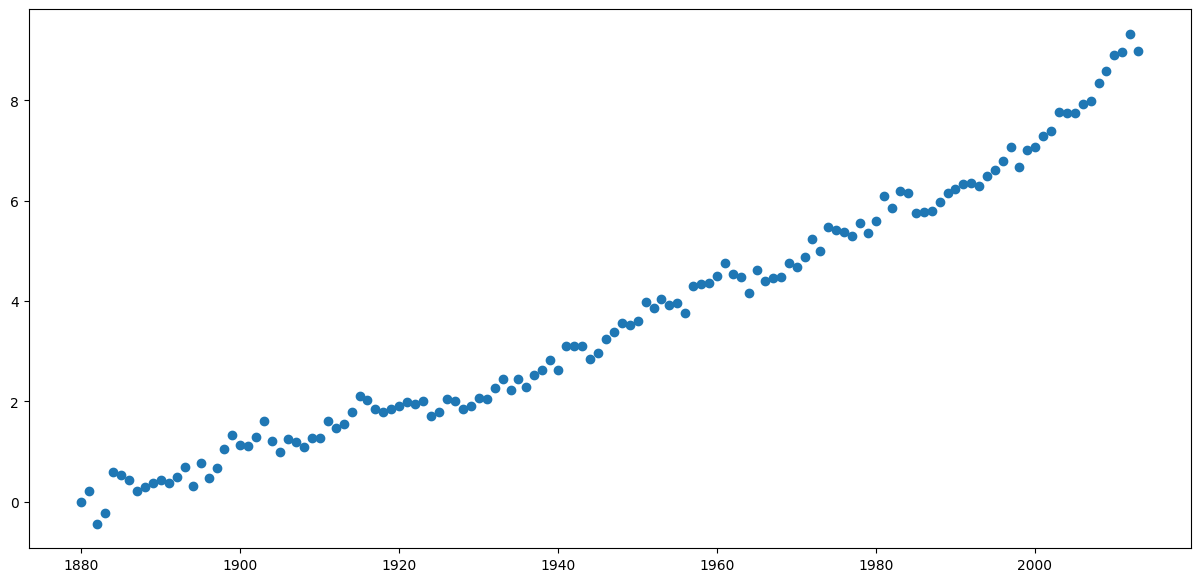

In [7]:
plt.figure(figsize=(15, 7))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

## Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit

In [13]:
slope, intercept, _, _, _ = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

Slope: 0.06
Intercept: -119.07


## Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050

### Create x values for line of best fit

In [18]:
years = range(df['Year'].min(), 2051)
years

range(1880, 2051)

### Calc y values for line of best fit

In [32]:
y = [slope * year + intercept for year in years]
y[0:10]

[np.float64(-0.5421240249263661),
 np.float64(-0.4790794409142336),
 np.float64(-0.41603485690208686),
 np.float64(-0.3529902728899543),
 np.float64(-0.2899456888778218),
 np.float64(-0.22690110486568926),
 np.float64(-0.16385652085355673),
 np.float64(-0.1008119368414242),
 np.float64(-0.037767352829277456),
 np.float64(0.025277231182855076)]

In [31]:
y[-11:-1]

[np.float64(9.545009417015194),
 np.float64(9.608054001027341),
 np.float64(9.671098585039488),
 np.float64(9.734143169051606),
 np.float64(9.797187753063753),
 np.float64(9.860232337075871),
 np.float64(9.923276921088018),
 np.float64(9.986321505100136),
 np.float64(10.049366089112283),
 np.float64(10.11241067312443)]

### Plot line of best fit on scatter plot

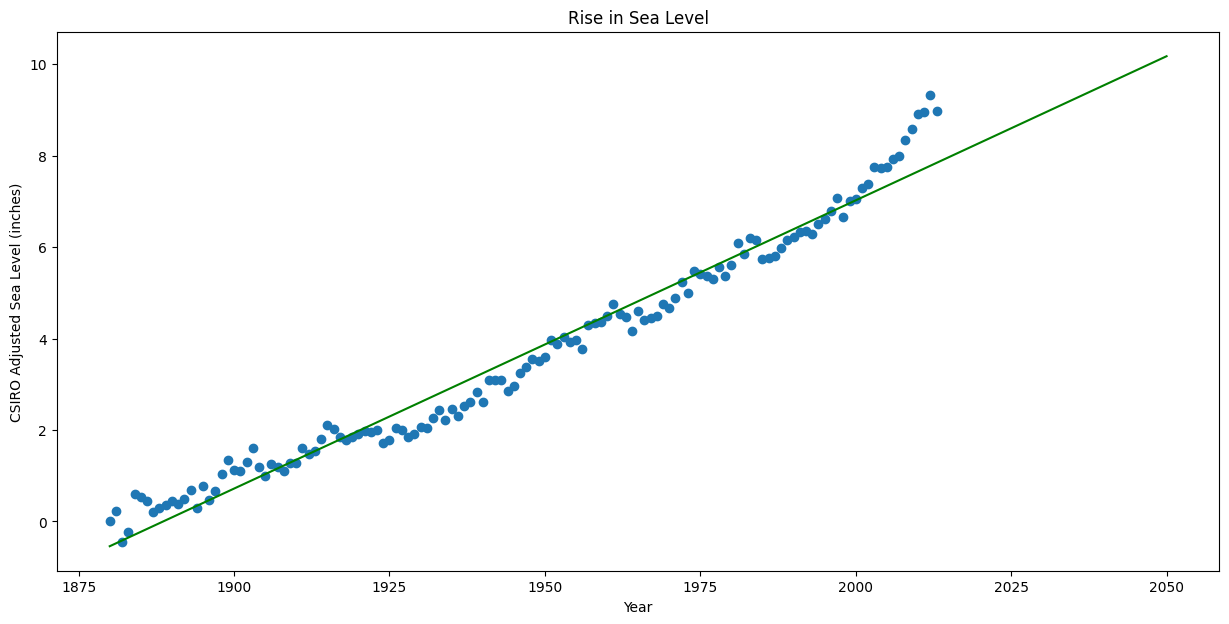

In [34]:
# Scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

# Line of best fit
plt.plot(years, y, 'g')

# Labels
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.show()